# EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
student_mat = pd.read_csv('data\\raw\\student-mat.csv')
student_por = pd.read_csv('data\\raws\\tudent-por.csv')

# 合并两个数据集
students = pd.concat([student_mat, student_por], ignore_index=True)

# 查看基本信息
print(students.info())
print(students.describe())
print(students.describe(include=[object]))
students

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      971 non-null    object
 1   sex         971 non-null    object
 2   age         971 non-null    int64 
 3   address     971 non-null    object
 4   famsize     971 non-null    object
 5   Pstatus     971 non-null    object
 6   Medu        971 non-null    int64 
 7   Fedu        971 non-null    int64 
 8   Mjob        971 non-null    object
 9   Fjob        971 non-null    object
 10  reason      971 non-null    object
 11  guardian    971 non-null    object
 12  traveltime  971 non-null    int64 
 13  studytime   971 non-null    int64 
 14  failures    971 non-null    int64 
 15  schoolsup   971 non-null    object
 16  famsup      971 non-null    object
 17  paid        971 non-null    object
 18  activities  971 non-null    object
 19  nursery     971 non-null    object
 20  higher    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
967,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
968,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
969,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [4]:
# 检查缺失值
missing_values = students.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


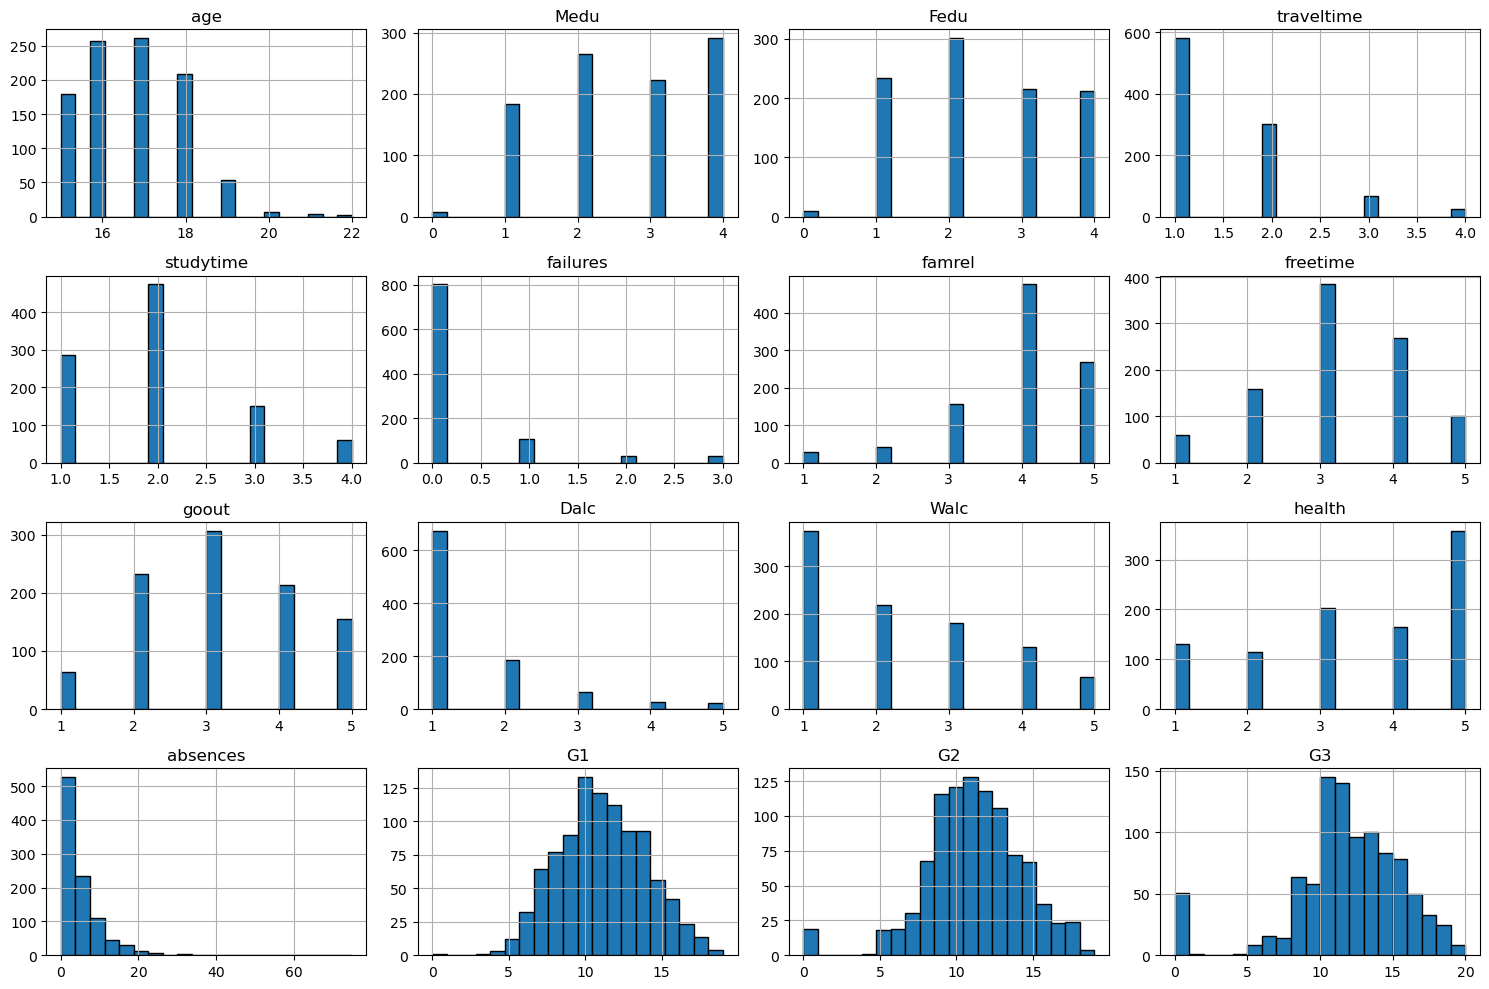

In [5]:
# 数值变量的分布
num_cols = students.select_dtypes(include=[np.number]).columns.tolist()
students[num_cols].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

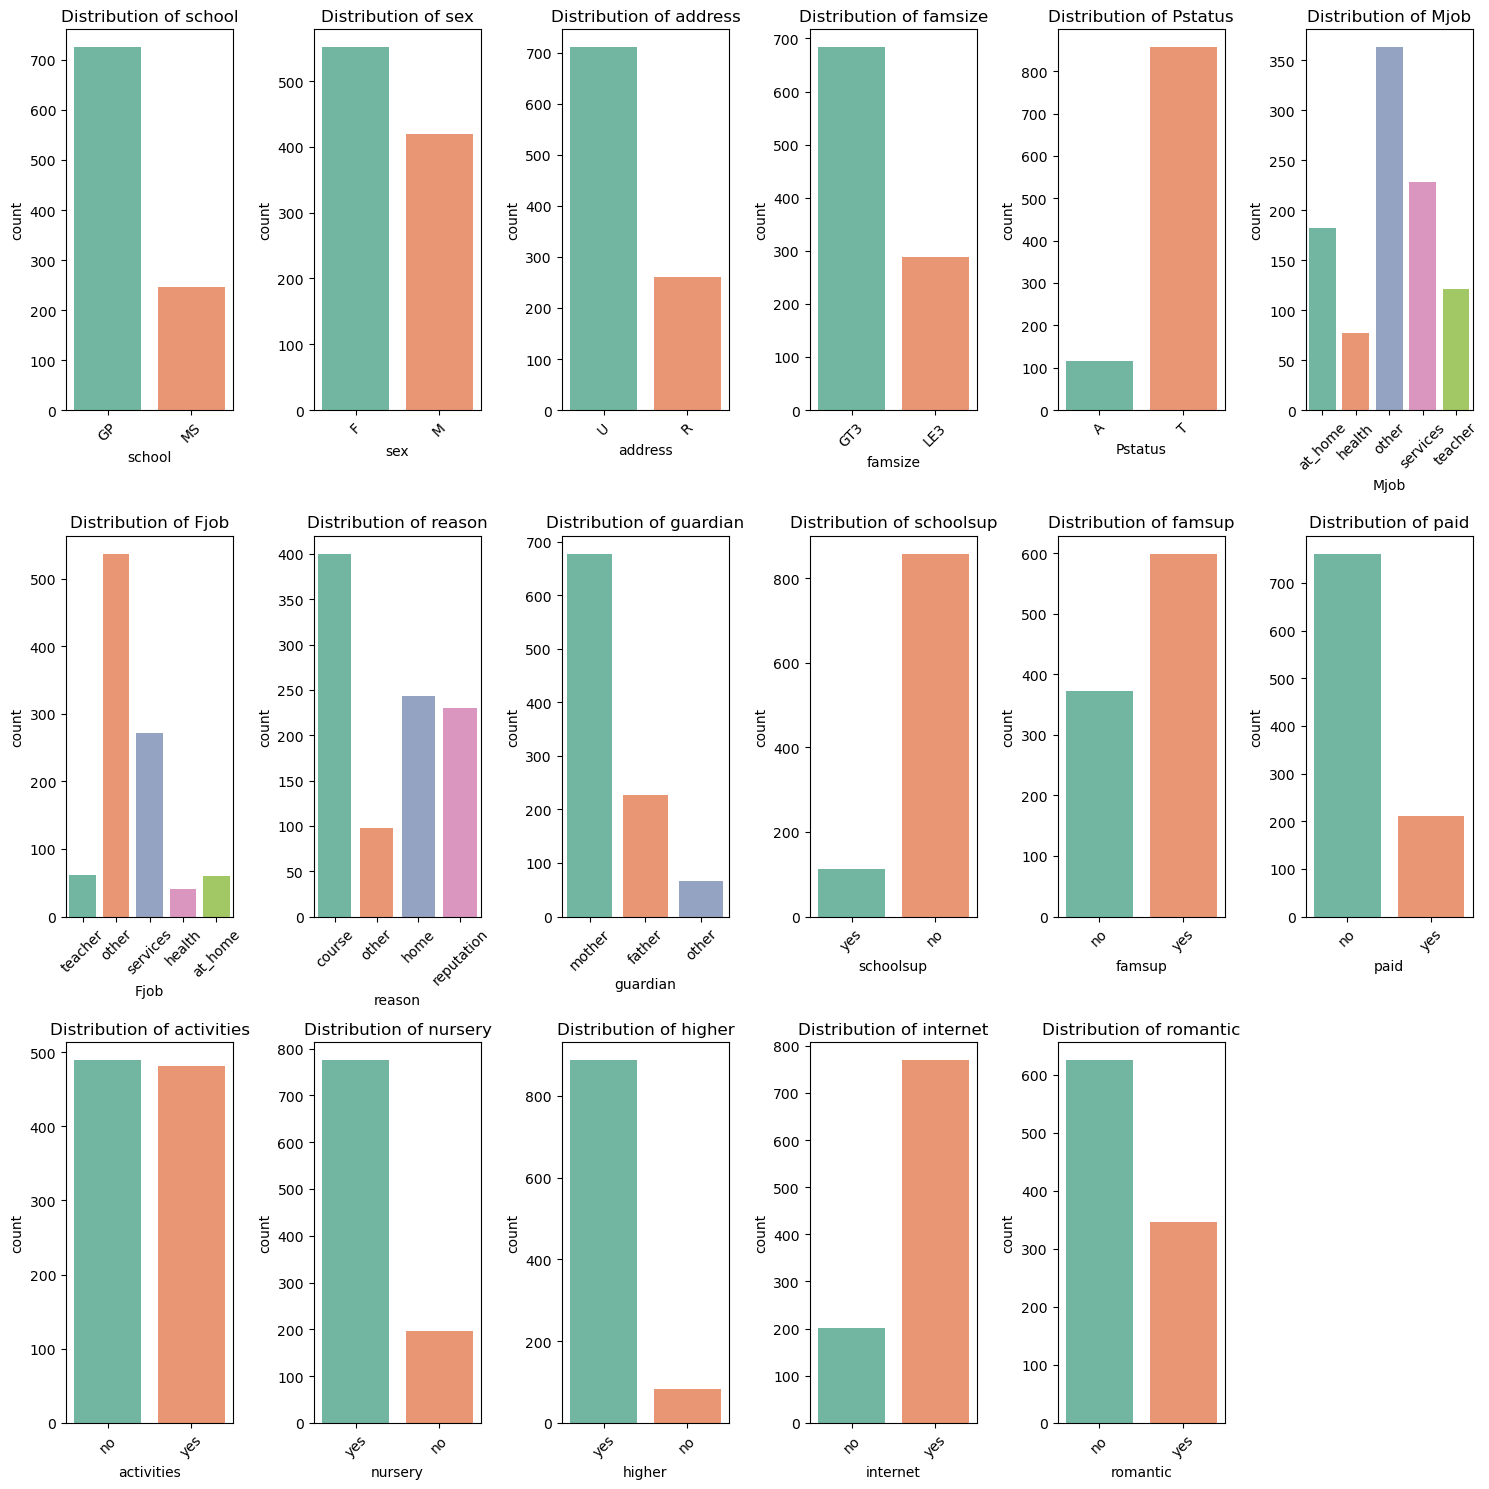

In [9]:
# 分类变量的分布
cat_cols = students.select_dtypes(include=[object]).columns.tolist()
num_cols = 6  # 每行显示的图表数
num_rows = (len(cat_cols) + num_cols - 1) // num_cols  # 计算行数

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=students, x=col, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# 如果图表数少于子图数，将多余的子图隐藏
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

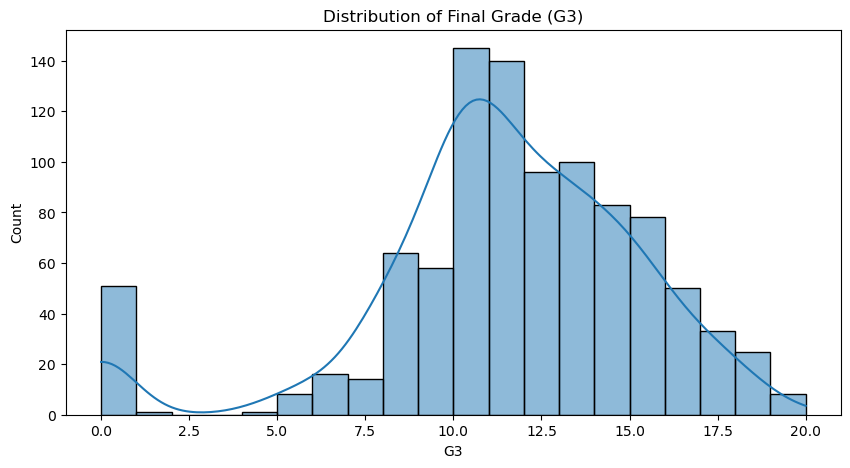

In [12]:

# 最终成绩（G3）的分布
plt.figure(figsize=(10, 5))
sns.histplot(students['G3'], kde=True, bins=20)
plt.title('Distribution of Final Grade (G3)')
plt.show()



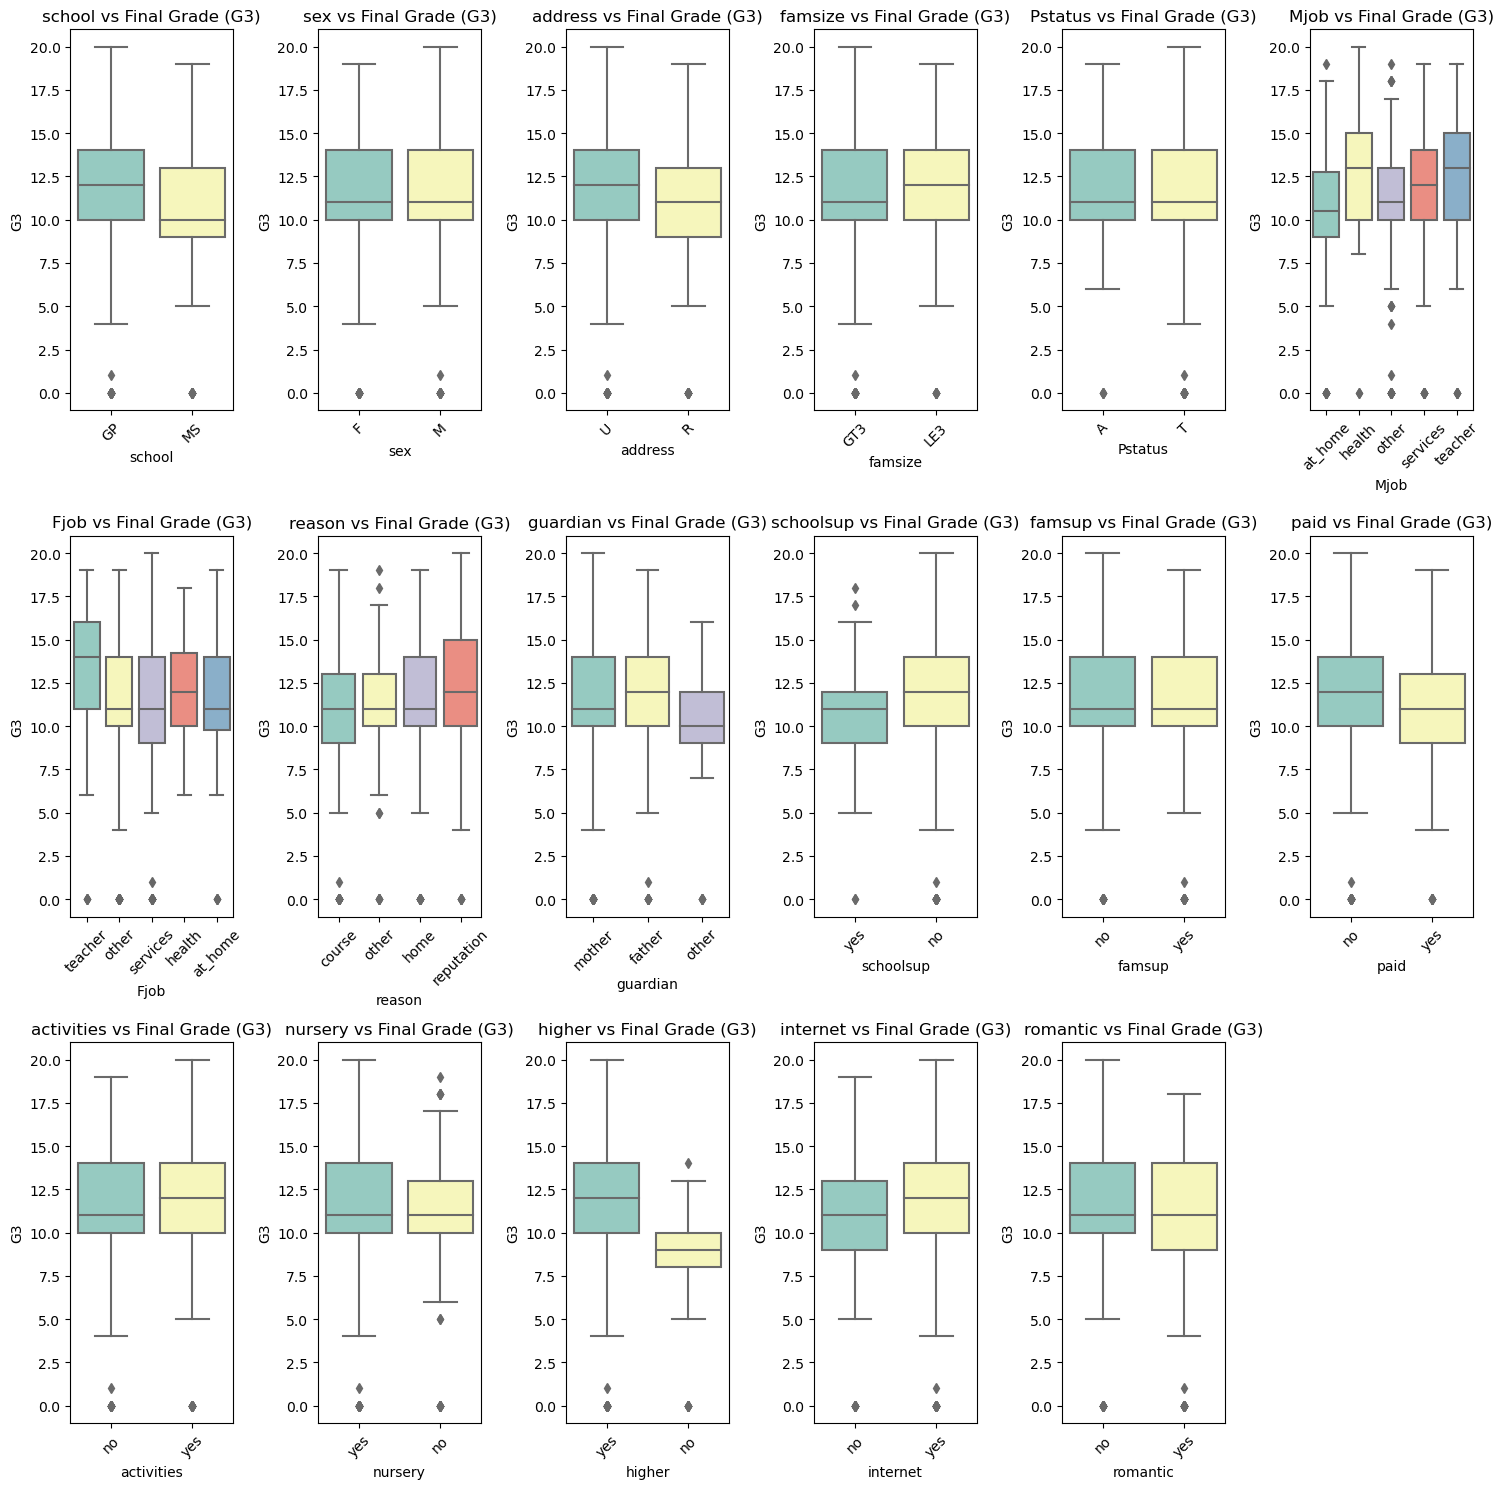

In [17]:
# G3与其他变量的关系
# 分类变量与G3的关系
cat_cols = students.select_dtypes(include=[object]).columns.tolist()
num_cols = 6  # 每行显示的图表数
num_rows = (len(cat_cols) + num_cols - 1) // num_cols  # 计算行数

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.boxplot(x=col, y='G3', data=students, palette='Set3', ax=axes[i])
    axes[i].set_title(f'{col} vs Final Grade (G3)')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# 如果图表数少于子图数，将多余的子图隐藏
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

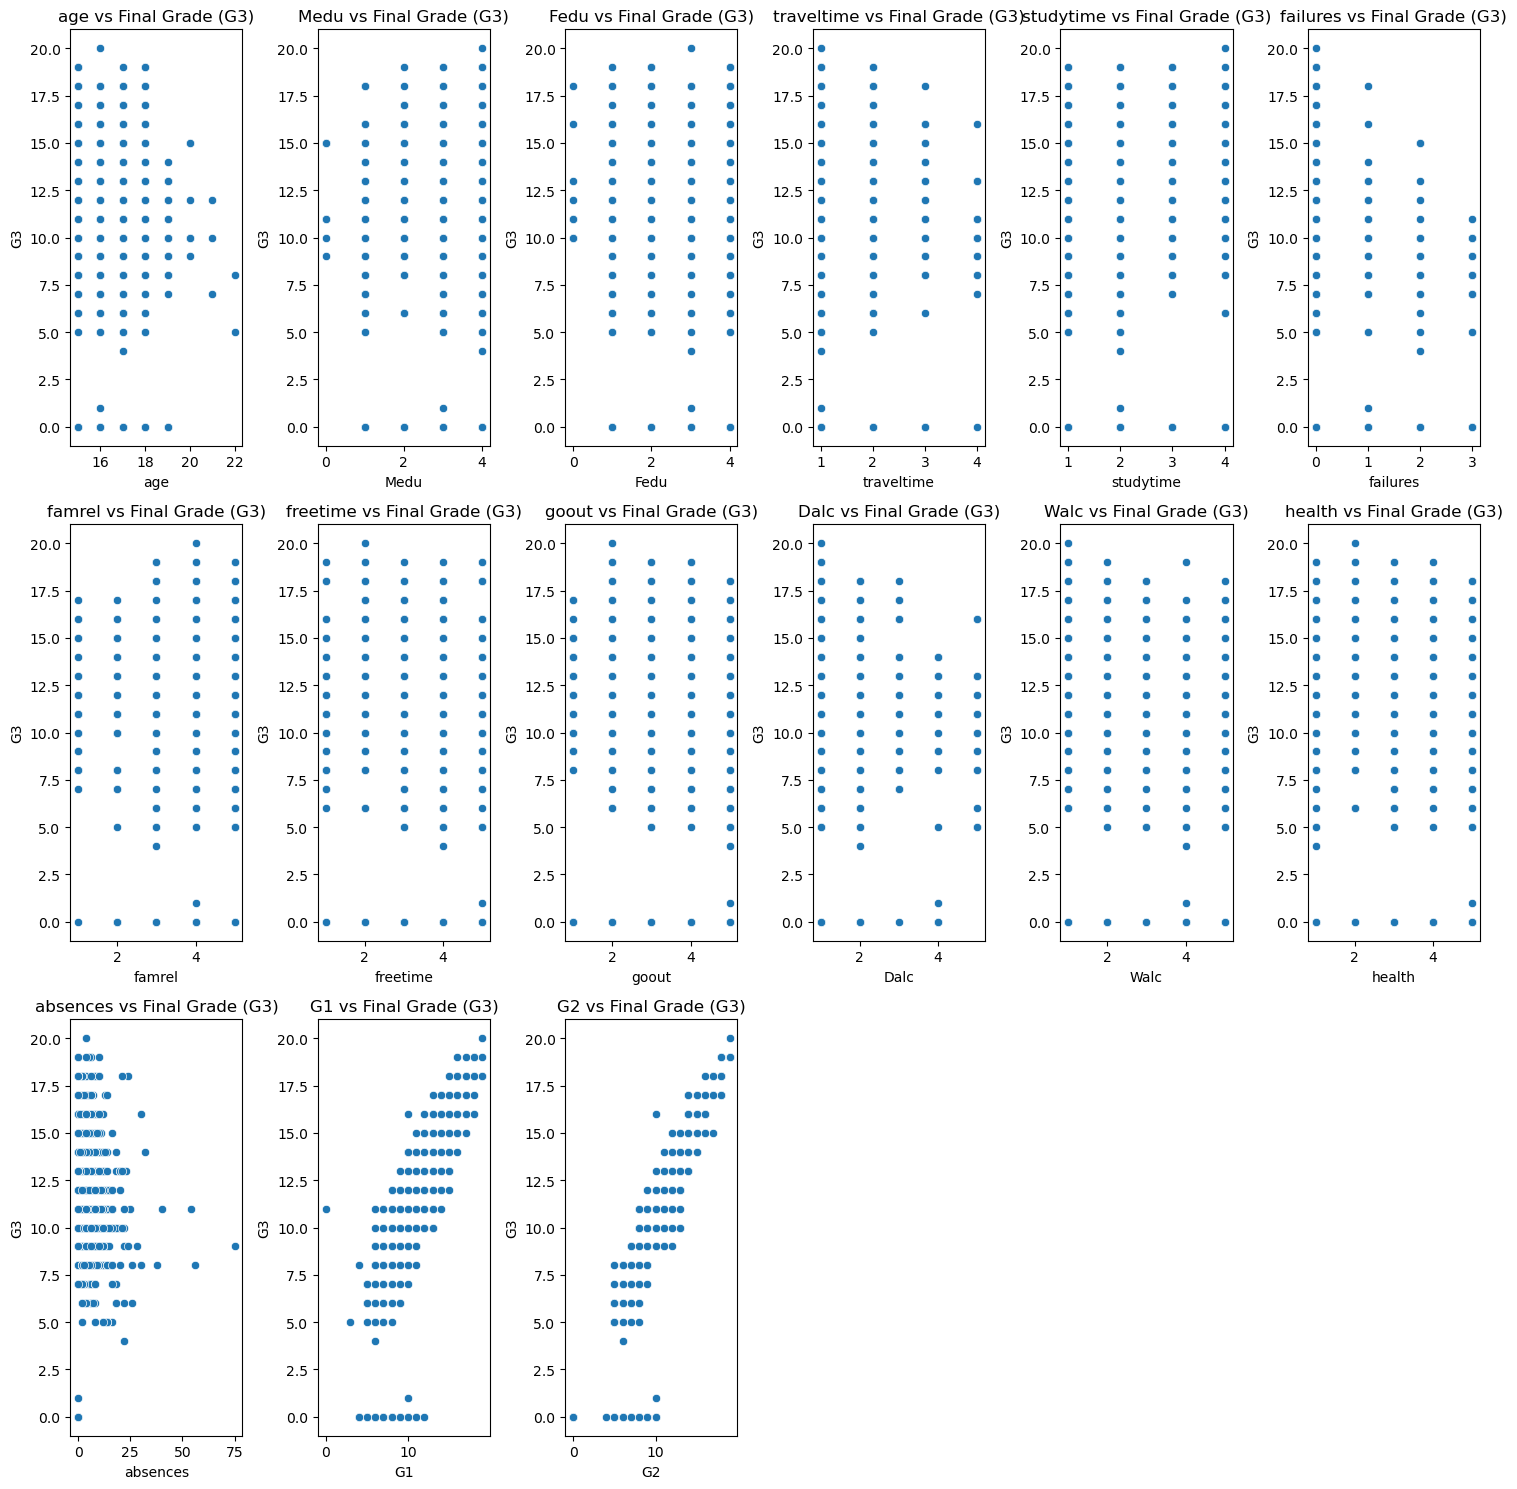

In [18]:

# 数值变量与G3的关系
num_cols = students.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove('G3')  # 移除G3本身
num_plots_per_row = 6  # 每行显示的图表数
num_rows = (len(num_cols) + num_plots_per_row - 1) // num_plots_per_row  # 计算行数

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.scatterplot(x=col, y='G3', data=students, ax=axes[i])
    axes[i].set_title(f'{col} vs Final Grade (G3)')

# 如果图表数少于子图数，将多余的子图隐藏
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder

# 将所有分类变量转换为数字
label_encoders = {}
cat_cols = students.select_dtypes(include=[object]).columns.tolist()

for col in cat_cols:
    le = LabelEncoder()
    students[col] = le.fit_transform(students[col])
    label_encoders[col] = le

# 相关性分析
correlation_matrix = students.corr()
correlation_with_g3 = correlation_matrix["G3"].abs().sort_values(ascending=False)
print(correlation_with_g3)

# 选择与G3相关性较高的特征
high_corr_features = correlation_with_g3[correlation_with_g3 > 0.1].index.tolist()
high_corr_features.remove('G3')  # 移除目标变量本身
print(f'Selected features: {high_corr_features}')

G3            1.000000
G2            0.908721
G1            0.807617
failures      0.383543
higher        0.239219
Medu          0.205809
Fedu          0.162203
studytime     0.160943
age           0.134208
Dalc          0.127260
address       0.124963
reason        0.123837
Walc          0.117179
school        0.115778
internet      0.111070
Mjob          0.111027
goout         0.107894
traveltime    0.106327
romantic      0.091345
schoolsup     0.086836
guardian      0.085859
health        0.085569
freetime      0.068372
famsize       0.060223
famrel        0.053736
absences      0.048212
paid          0.047081
activities    0.043956
nursery       0.039894
Fjob          0.039511
Pstatus       0.019554
famsup        0.018165
sex           0.017458
Name: G3, dtype: float64
Selected features: ['G2', 'G1', 'failures', 'higher', 'Medu', 'Fedu', 'studytime', 'age', 'Dalc', 'address', 'reason', 'Walc', 'school', 'internet', 'Mjob', 'goout', 'traveltime']


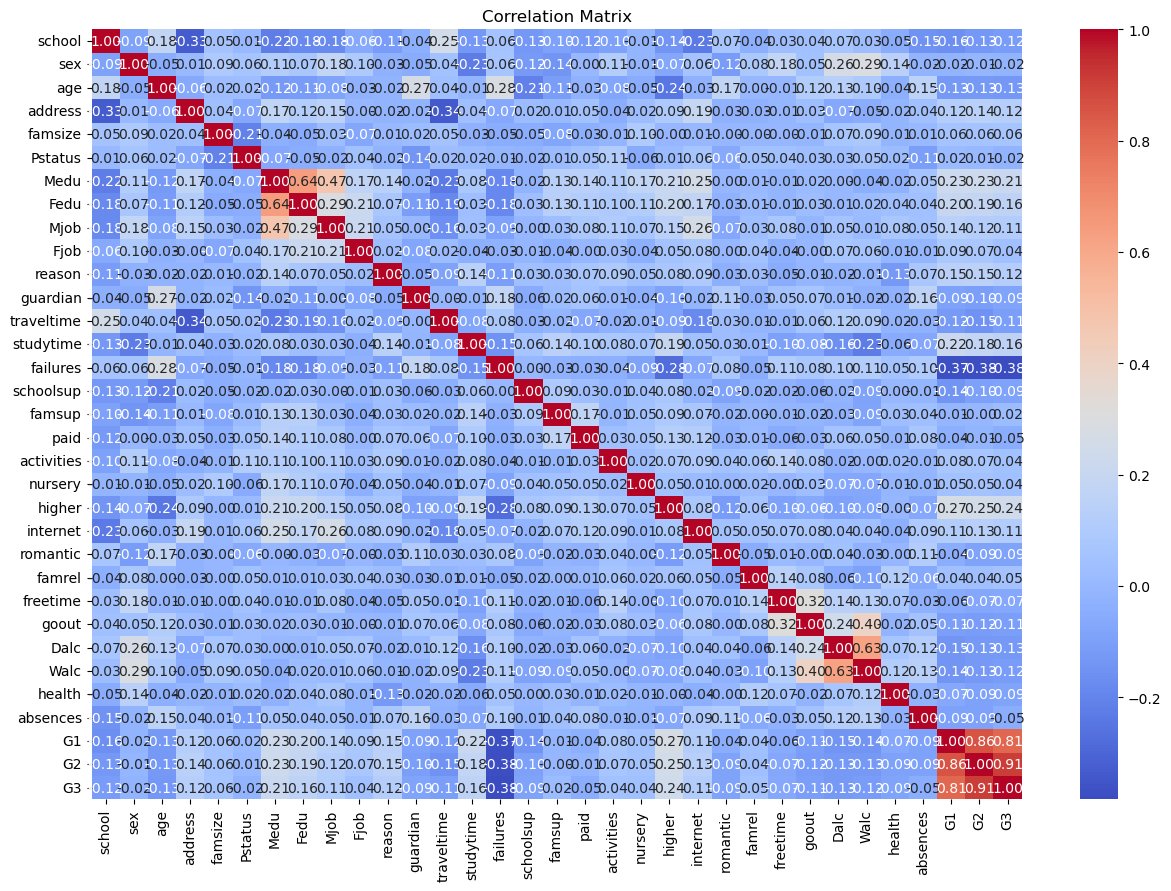

In [22]:
# 可视化相关性矩阵
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()